In [ ]:
!wget -c http://ufldl.stanford.edu/housenumbers/train_32x32.mat
!wget -c http://ufldl.stanford.edu/housenumbers/test_32x32.mat

--2023-11-13 22:03:14--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Распознаётся ufldl.stanford.edu (ufldl.stanford.edu)… 171.64.68.10
Подключение к ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 416 Requested Range Not Satisfiable

    Файл уже полностью загружен; нечего выполнять.

--2023-11-13 22:03:15--  http://ufldl.stanford.edu/housenumbers/test_32x32.mat
Распознаётся ufldl.stanford.edu (ufldl.stanford.edu)… 171.64.68.10
Подключение к ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 416 Requested Range Not Satisfiable

    Файл уже полностью загружен; нечего выполнять.



In [ ]:
from sklearn.naive_bayes import GaussianNB
from scipy.io import loadmat
import numpy as np
from dataset import load_svhn

# Загрузка данных
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=10)

# Преобразование размерности данных
train_X_flatten = train_X.reshape(train_X.shape[0], -1)
test_X_flatten = test_X.reshape(test_X.shape[0], -1)

# Создание и обучение модели
model = GaussianNB()
model.fit(train_X_flatten, train_y)

GaussianNB()

In [ ]:
train_X[0].shape

(32, 32, 3)

In [ ]:
import sklearn.metrics as metrics

# Предсказание классов для тренировочных и тестовых данных
train_pred = model.predict(train_X_flatten)
test_pred = model.predict(test_X_flatten)

# Вычисление метрик точности
train_accuracy = metrics.accuracy_score(train_y, train_pred)
test_accuracy = metrics.accuracy_score(test_y, test_pred)

# Вывод результатов
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.169
Test Accuracy: 0.1


In [ ]:
from skimage.feature import hog

In [ ]:
print(train_X.shape)
print(type(train_X))
train_X_1 = {}
for i in range(len(train_X)):
    train_X_1[i] = np.mean(train_X[i], axis=2)
print(type(train_X_1))
train_X = np.array(list(train_X_1.values()))
train_X.shape

(1000, 32, 32, 3)
<class 'numpy.ndarray'>
<class 'dict'>


(1000, 32, 32)

In [ ]:
train_X_flatten = train_X.reshape(train_X.shape[0], -1)
model.fit(train_X_flatten, train_y)

GaussianNB()

In [ ]:
train_pred = model.predict(train_X_flatten)
train_accuracy = metrics.accuracy_score(train_y, train_pred)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.161


In [ ]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)
train_X_hog = {}
test_X_hog = {}
for i in range(train_X.shape[0]):
    train_X_hog[i] = hog(train_X[i], channel_axis=-1)
for i in range(test_X.shape[0]):
    test_X_hog[i] = hog(test_X[i], channel_axis=-1)

# Объединение HOG-признаков с исходными признаками
train_X_combined = np.array(list(train_X_hog.values()))
test_X_combined = np.array(list(test_X_hog.values()))

# Создание и обучение модели
model = GaussianNB()
model.fit(train_X_combined, train_y)


GaussianNB()

In [ ]:
train_y_pred = model.predict(train_X_combined)
test_y_pred = model.predict(test_X_combined)

In [ ]:

train_accuracy = metrics.accuracy_score(train_y, train_y_pred)
test_accuracy = metrics.accuracy_score(test_y, test_y_pred)

# Вывод результатов
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.722
Test Accuracy: 0.64


In [ ]:
from sklearn.metrics import classification_report

class_report = classification_report(test_y, test_y_pred)
print("Отчет классификации:")
print(class_report)

Отчет классификации:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.83      0.71      0.77        14
           2       0.79      0.79      0.79        14
           3       0.36      0.33      0.35        12
           4       0.73      0.73      0.73        11
           5       0.80      0.89      0.84         9
           6       0.57      0.57      0.57         7
           7       0.78      0.70      0.74        10
           8       0.43      0.43      0.43         7
           9       0.27      0.75      0.40         4

    accuracy                           0.64       100
   macro avg       0.63      0.64      0.62       100
weighted avg       0.67      0.64      0.65       100



In [ ]:
import matplotlib.pyplot as plt4

%matplotlib inline

%load_ext autoreload
%autoreload 2

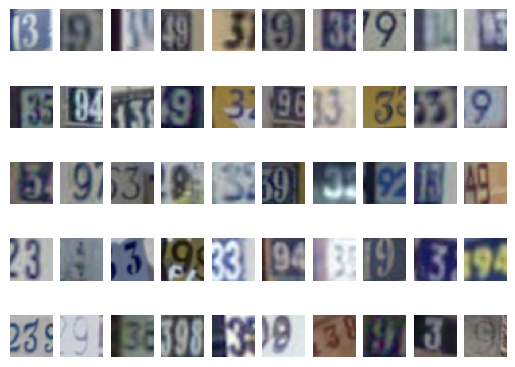

In [ ]:
samples_per_class = 25  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        if class_index not in [3, 9]:  # Skip classes other than 3 and 9
            continue
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1